In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import folium
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement

In [2]:
#generate dataframe
url = 'https://raw.githubusercontent.com/raminstad/Tools1_Final/main/final_df.csv'
df = pd.read_csv(url, index_col=0)


#convert year|month|day to float type. Columns contain string, int, and Nan
for i in range(0,3):
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]], errors='coerce')


#drop all rows with Nan values in year|month|day
#convert to int type for analysis
for c in range(0,3):
    col = df.columns[c]
    for i in range(0,len(df)):
        if pd.isnull(df.loc[i][col]):
            df.drop(i, inplace=True)
    df.reset_index(inplace=True, drop = True)
    df[col] = df[col].astype(int)





/var/folders/_n/5nryjg917g707x1hxdr2fqhw0000gn/T/ipykernel_24083/289855324.py:3: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, index_col=0)


In [3]:
#get basic details from dataframe
df.describe()

,YEAR,MONTH,DAY,BAROMETER,THERMOMETER,LATITUDE,LONGITUDE
count,91272.000000,91272.000000,91272.000000,68478.000000,78394.000000,7060.000000,7212.000000
mean,1845.468424,6.526295,15.683430,29.668393,19.206488,0.438899,-4.707345
std,14.485907,3.347501,8.795111,2.031141,8.459335,37.880266,75.727162
min,1803.000000,1.000000,1.000000,3.080000,-35.000000,-67.380000,-357.490000
25%,1844.000000,4.000000,8.000000,29.720000,12.222222,-35.500000,-44.015000
50%,1846.000000,6.000000,16.000000,29.960000,20.000000,0.000000,-1.440000
75%,1850.000000,9.000000,23.000000,30.100000,26.666667,26.087500,41.292500
max,1984.000000,12.000000,31.000000,81.500000,65.000000,75.560000,179.540000


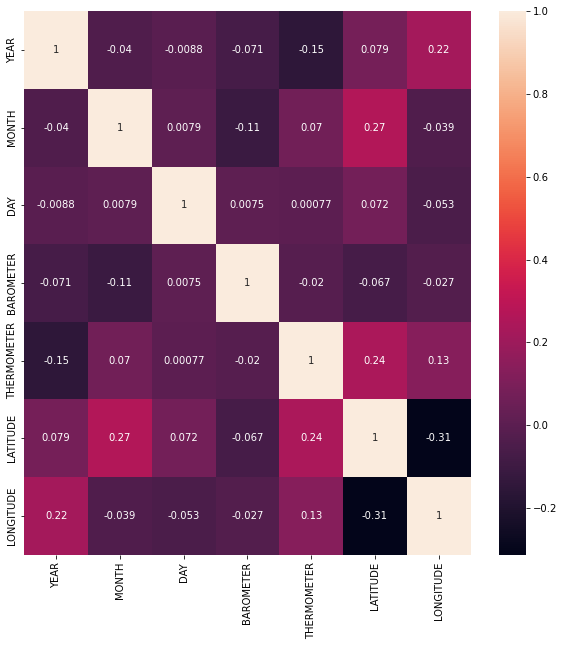

In [4]:
#correlation Matrix
plt.figure( figsize=(10,10))
corrMatrix = df.dropna(how='all').corr()
sn.heatmap(corrMatrix, annot = True)
plt.show()

## pivot tables with bins


In [5]:
lat = pd.cut(df['LATITUDE'],8)
dfPivot = df.pivot_table('THERMOMETER',index = ['YEAR', 'MONTH'], columns = lat)
dfPivot.reset_index(inplace = True)

long = pd.cut(df['LONGITUDE'],16)
dfPivotLong = df.pivot_table('THERMOMETER',index = ['YEAR', 'MONTH'], columns = long)
dfPivotLong.reset_index(inplace = True)

In [6]:
dfPivot.head()

LATITUDE,YEAR,MONTH,"(-67.523, -49.512]","(-49.512, -31.645]","(-31.645, -13.777]","(-13.777, 4.09]","(4.09, 21.958]","(21.958, 39.825]","(39.825, 57.692]","(57.692, 75.56]"
0,1804,3,NaN,NaN,NaN,NaN,30.046296,NaN,NaN,NaN
1,1804,4,NaN,NaN,26.562500,29.722222,NaN,NaN,NaN,NaN
2,1804,5,NaN,18.888889,19.722222,NaN,NaN,NaN,NaN,NaN
3,1804,6,NaN,NaN,20.972222,NaN,NaN,NaN,NaN,NaN
4,1804,7,NaN,NaN,NaN,NaN,NaN,25.347222,21.944444,NaN


In [7]:
dfPivotLong.head()

LONGITUDE,YEAR,MONTH,"(-358.027, -323.926]","(-323.926, -290.361]","(-290.361, -256.797]","(-256.797, -223.233]","(-223.233, -189.668]","(-189.668, -156.104]","(-156.104, -122.539]","(-122.539, -88.975]","(-88.975, -55.411]","(-55.411, -21.846]","(-21.846, 11.718]","(11.718, 45.282]","(45.282, 78.847]","(78.847, 112.411]","(112.411, 145.976]","(145.976, 179.54]"
0,1804,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.046296,NaN,NaN
1,1804,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.5625,29.722222,NaN,NaN
2,1804,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.166667,NaN,NaN,NaN,NaN
3,1804,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.972222,NaN,NaN,NaN,NaN,NaN
4,1804,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.645833,NaN,NaN,NaN,NaN,NaN,NaN


## Mean and Standard Deviation of thermometer and barometer over years

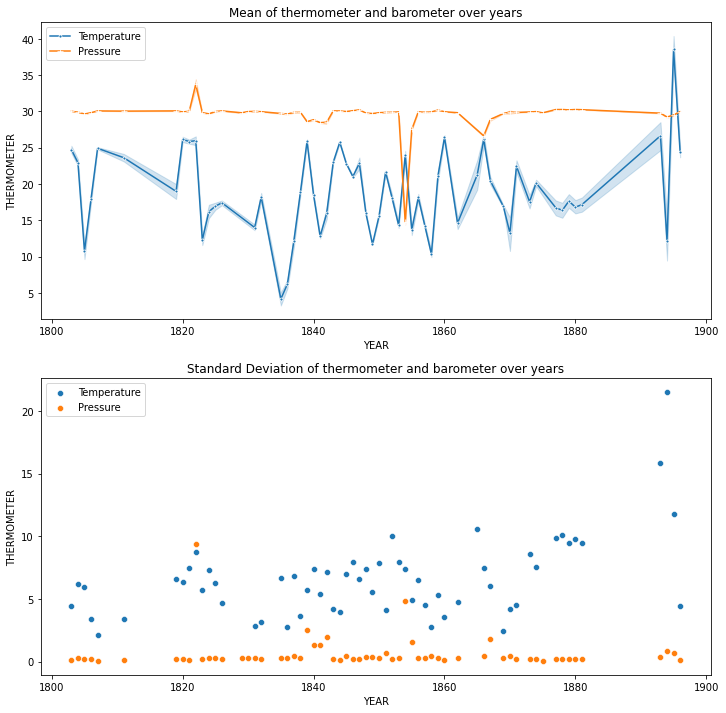

In [8]:
#mean
f, axs = plt.subplots(2,1,figsize=(12,12))
axs[0].set_title('Mean of thermometer and barometer over years')
sn.lineplot(data=df[df['YEAR'] < 1900], x='YEAR', y = 'THERMOMETER', marker = '.', label = 'Temperature', ax=axs[0])
sn.lineplot(data=df[df['YEAR'] < 1900], x='YEAR', y = 'BAROMETER', marker = '+', label = 'Pressure', ax=axs[0])

#standard deviation
dfStdDivTemp = df[df['YEAR']<1900].groupby(by=['YEAR']).std()
dfStdDivPressure = df[df['YEAR']<1900].groupby(by=['YEAR']).std()
sn.scatterplot(x=dfStdDivTemp.index, y= dfStdDivTemp['THERMOMETER'], label = 'Temperature', ax=axs[1])
sn.scatterplot(x=dfStdDivPressure.index, y= dfStdDivPressure['BAROMETER'], label = 'Pressure', ax=axs[1])
axs[1].set_title('Standard Deviation of thermometer and barometer over years')



plt.legend()

## seperate latitude bin plots


<AxesSubplot:xlabel='LATITUDE', ylabel='THERMOMETER'>

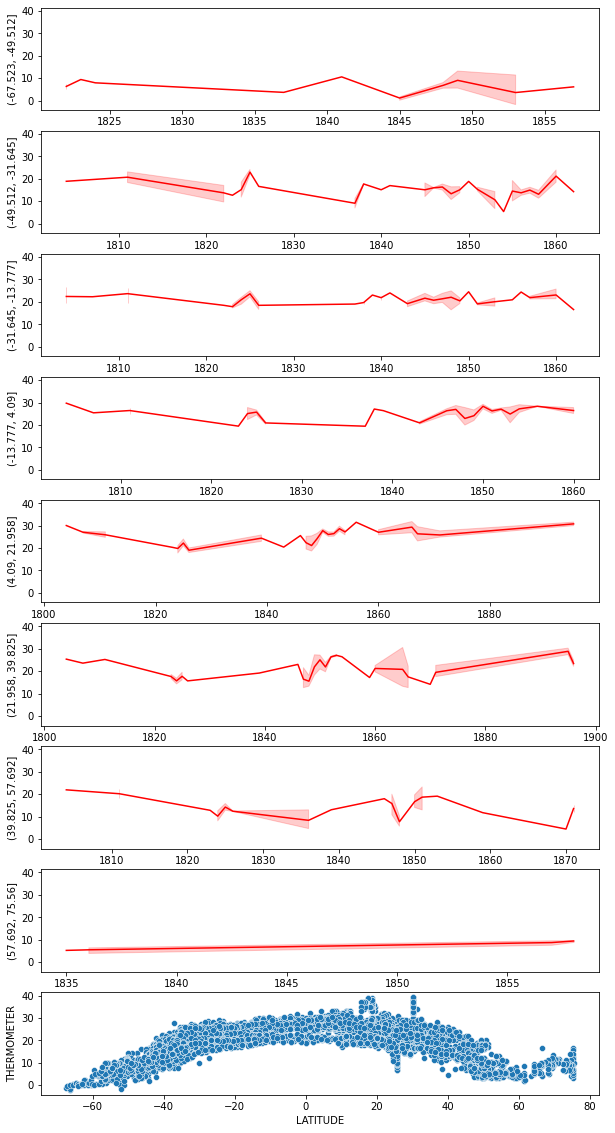

In [9]:
fig, ax = plt.subplots(9, figsize = (10,20), sharey=True)
for i in range(8):
    sn.lineplot( x ="YEAR", y = dfPivot.iloc[:,i+2], color = 'r', data = dfPivot, ax = ax[i])
sn.scatterplot(x = 'LATITUDE', y= 'THERMOMETER', data = df, ax = ax[8])

## seperate longitude bin plots

<AxesSubplot:xlabel='LONGITUDE', ylabel='THERMOMETER'>

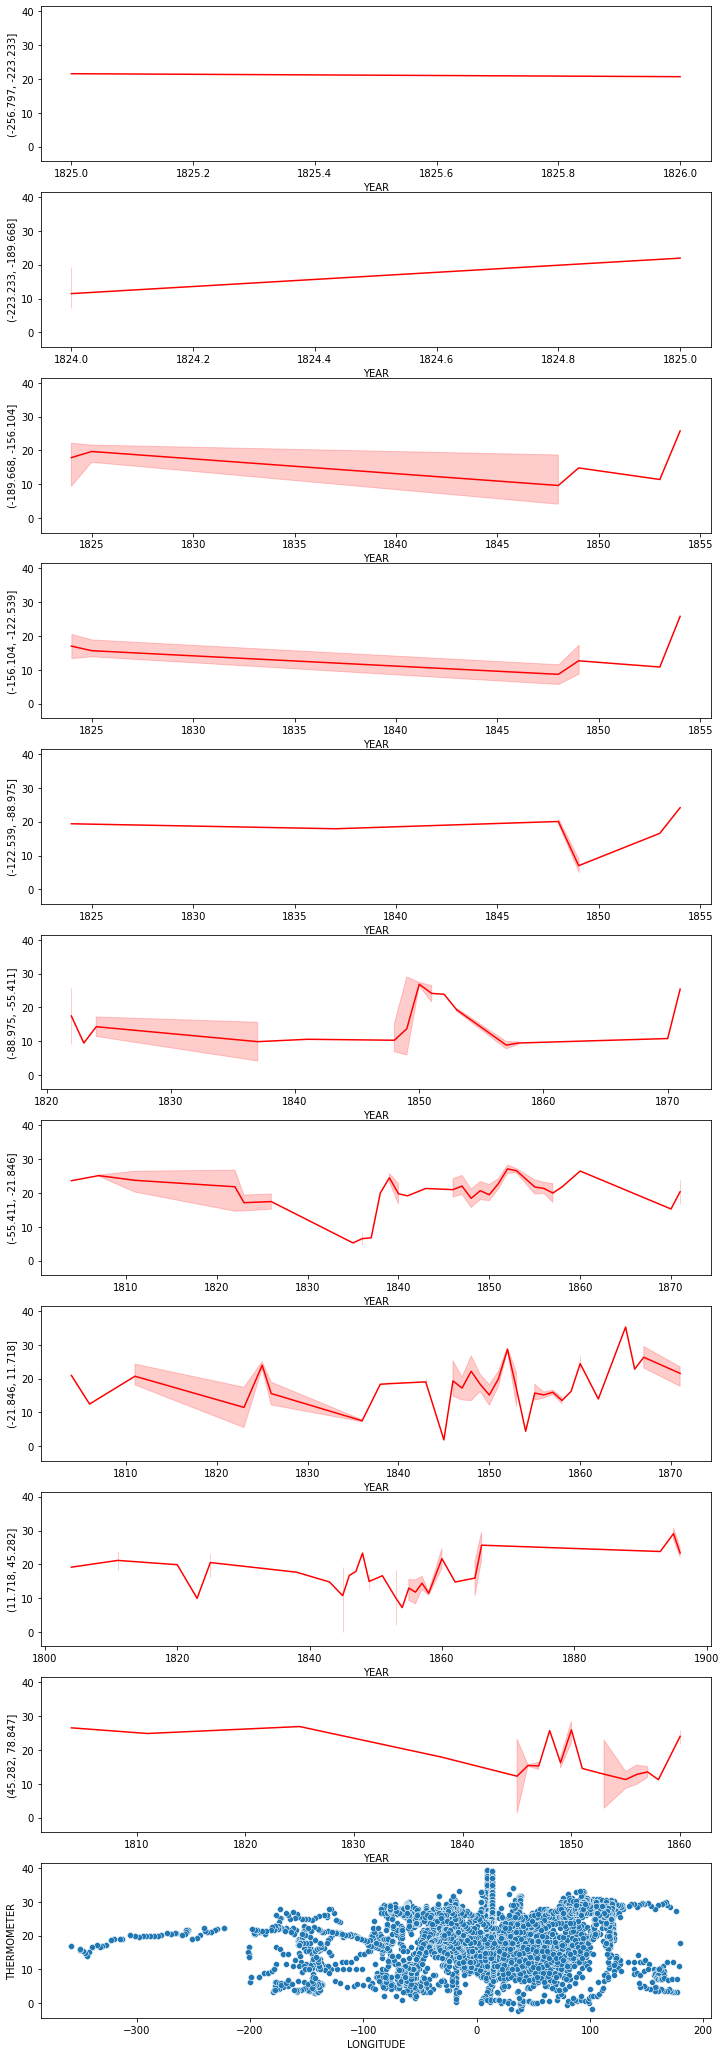

In [10]:
fig, ax = plt.subplots(11, figsize = (12,37), sharey=True)
for i in range(10):
    sn.lineplot( x ="YEAR", y = dfPivotLong.iloc[:,i+5], color = 'r', data = dfPivotLong, ax = ax[i])
sn.scatterplot(x = 'LONGITUDE', y= 'THERMOMETER', data = df, ax = ax[10])

## Folium map to visualize the temperature and pressure in our data

In [11]:
df1=df.dropna(how='any').reset_index(drop=True)

In [39]:
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script src="http://unpkg.com/leaflet@1.3.1/dist/leaflet.js"></script>
  <script src="js/leaflet-providers.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Draggable Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Temperture more than .5 quantile</li>
    <li><span style='background:yellow;opacity:0.7;'></span>Temperture less than .5 quantile</li>
    


    
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

m = folium.Map(tiles="Stamen Toner",
location=[0, 0], zoom_start=2.6)
for i in range(len(df1)):
    temp=df1.loc[i]['THERMOMETER']
    year=df1.loc[i]['YEAR']
    month=df1.loc[i]['MONTH']
    day=df1.loc[i]['DAY']
    pop=f"Temperture: \n {temp} <br>"f"Year: \n {year} <br>"f"Month: \n {month} <br>"f"Day: \n {day} <br>"
    if df1.loc[i]['THERMOMETER'] > df1['THERMOMETER'].quantile(.5) :
        color= 'red'
    elif df1.loc[i]['THERMOMETER'] < df1['THERMOMETER'].quantile(.5):
        color='yellow'
    
    folium.Circle(
    radius=50,
    location=[df1.loc[i]['LATITUDE'],df1.loc[i]['LONGITUDE']],
    color=color,
    fill=False,tooltip='Click for more info',
                                 popup=folium.Popup(pop,max_width=200,min_width=200)).add_to(m)
m
macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)  
m.save('temp.html')

In [40]:
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script src="http://unpkg.com/leaflet@1.3.1/dist/leaflet.js"></script>
  <script src="js/leaflet-providers.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Draggable Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Pressure more than .5 quantile</li>
    <li><span style='background:yellow;opacity:0.7;'></span>Pressure less than .5 quantile</li>
    


    
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

m = folium.Map(tiles="Stamen Toner",
location=[0, 0], zoom_start=2.6)
for i in range(len(df1)):
    pressure=df1.loc[i]['BAROMETER']
    year=df1.loc[i]['YEAR']
    month=df1.loc[i]['MONTH']
    day=df1.loc[i]['DAY']
    pop=f"Pressure: \n {pressure} <br>"f"Year: \n {year} <br>"f"Month: \n {month} <br>"f"Day: \n {day} <br>"
    if df1.loc[i]['BAROMETER'] > df1['BAROMETER'].quantile(.5) :
        color= 'red'
    elif df1.loc[i]['BAROMETER'] < df1['BAROMETER'].quantile(.5):
        color='yellow'
    
    folium.Circle(
    radius=50,
    location=[df1.loc[i]['LATITUDE'],df1.loc[i]['LONGITUDE']],
    color=color,
    fill=False,tooltip='Click for more info',
                                 popup=folium.Popup(pop,max_width=200,min_width=200)).add_to(m)

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)  
m.save('pressure.html')